# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [1]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tabela = pd.read_csv("advertising.csv")
display(tabela)
tabela.info()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


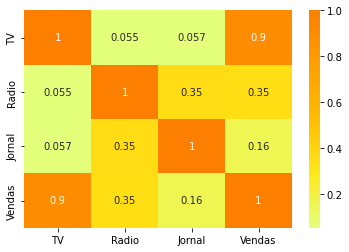

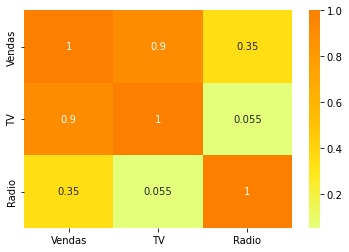

In [12]:
#correlacao
display(tabela.corr())

#wistia é uma escala de cores
#annot - anotacoes = sim
sns.heatmap(tabela.corr(), annot=True, cmap="Wistia")
plt.show()

#correlacao tirando jornal

sns.heatmap(tabela[['Vendas','TV','Radio']].corr(), annot=True, cmap="Wistia")
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [18]:
from sklearn.model_selection import train_test_split

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis=1)

#a ordem importa
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina as inteligencias artificias
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [24]:
from sklearn import metrics

# criar as previsoes
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

# comparar os modelos
print(metrics.r2_score(y_teste, previsao_regressaolinear))
print(metrics.r2_score(y_teste, previsao_arvoredecisao))  

0.9071151423684273
0.9630618772667847


#### Visualização Gráfica das Previsões

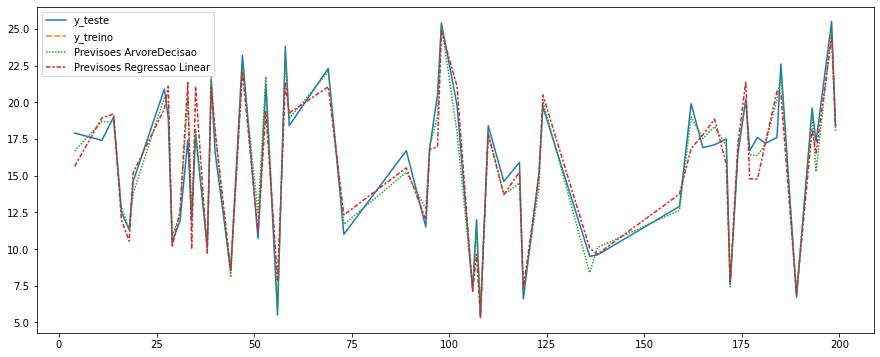

In [28]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["y_treino"] = y_treino
tabela_auxiliar["Previsoes ArvoreDecisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsoes Regressao Linear"] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [33]:
# Como fazer uma nova previsao
# importar a nova_tabela com o pandas (a nova tabela tem que ter os dados de TV, Radio e Jornal)
# previsao = modelo_randomforest.predict(nova_tabela)
# print(previsao)
nova_tabela = pd.read_csv("novos.csv")
display(nova_tabela)
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.829  8.572 19.637]


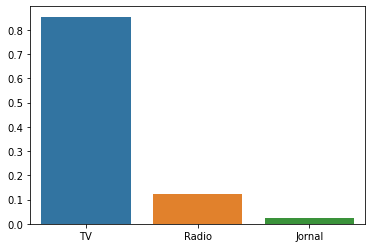

Radio     4652.8
Jornal    6110.8
dtype: float64


In [40]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

# Caso queira comparar Radio com Jornal
print(tabela[["Radio", "Jornal"]].sum())